In [4]:
##import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
##load the dataset
match_df=pd.read_csv('Desktop/matches.csv')
match_df.head() ##if you want random five than use sample function instead of head

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
divr_df=pd.read_csv('Desktop/deliveries.csv')
divr_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
match_df.info() ##it gives you all th information about number of rows
##because all values are not 756 therefore there are some missing values which might have to address

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [13]:
divr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

Exploratory data analysis

In [14]:
match_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [16]:
match_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [18]:
##checking for missing values 
match_df[match_df['winner'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [19]:
##replacing null results
match_df['winner'].fillna('draw',inplace=True)

In [20]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             756 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [25]:
team_encodings={'Mumbai Indians': 1,                 
'Kings XI Punjab': 2 ,
'Chennai Super Kings' :3,
'Royal Challengers Bangalore' : 4,
'Kolkata Knight Riders':5,
'Delhi Daredevils': 6 ,
'Rajasthan Royals': 7,
'Sunrisers Hyderabad': 8,
'Deccan Chargers':9 ,
'Pune Warriors' : 10,
'Gujarat Lions'  : 11,
'Rising Pune Supergiant' : 12,
'Kochi Tuskers Kerala': 13,
'Rising Pune Supergiants' : 12,
'Delhi Capitals': 13,
               'draw': 14}
team_encode_dict={
    'team1':team_encodings,
    'team2':team_encodings,
    'toss_winner':team_encodings,
    'winner':team_encodings
}

match_df.replace(team_encode_dict,inplace = True)
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,8,4,4,field,normal,0,8,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,12,12,field,normal,0,12,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,11,5,5,field,normal,0,5,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,12,2,2,field,normal,0,2,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,4,6,4,bat,normal,0,4,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [26]:
## MISSING VALUES IN CITY COL
match_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Port Elizabeth      7
Ranchi              7
Abu Dhabi           7
Cape Town           7
Cuttack             7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

In [27]:
match_df[match_df['city'].isnull()== True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,4,4,field,normal,0,4,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,5,6,5,bat,normal,0,6,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,3,7,7,field,normal,0,3,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,8,6,8,bat,normal,0,8,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,3,1,bat,normal,0,3,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,4,2,2,field,normal,0,2,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,8,1,1,field,normal,0,8,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [29]:
match_df['city'].fillna('dubai',inplace=True)
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               756 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             756 non-null int64
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(6), object(12)
memory usage: 106.4+ KB


In [30]:
match_df.describe()

,id,season,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,4.931217,13.283069,3.350529
std,3464.478148,3.366895,0.156630,3.080901,23.471144,3.387963
min,1.000000,2008.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,7.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,14.000000,146.000000,10.000000


##toss wins and match wins 

In [33]:
toss_wins=match_df['toss_winner'].value_counts(sort=True)
match_wins=match_df['winner'].value_counts(sort=True)

for idx, val in toss_wins.iteritems():
    print(f"{list(team_encode_dict['winner'].keys())[idx - 1]}->{toss_wins[idx]}")

Mumbai Indians->98
Kolkata Knight Riders->92
Chennai Super Kings->89
Royal Challengers Bangalore->81
Kings XI Punjab->81
Rajasthan Royals->80
Delhi Daredevils->80
Sunrisers Hyderabad->46
Deccan Chargers->43
Pune Warriors->20
Kochi Tuskers Kerala->18
Gujarat Lions->15
Rising Pune Supergiant->13


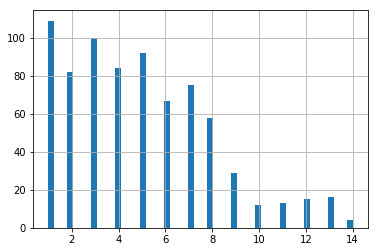

In [34]:
match_df['winner'].hist(bins=50)

Text(0.5, 1.0, 'match winners')

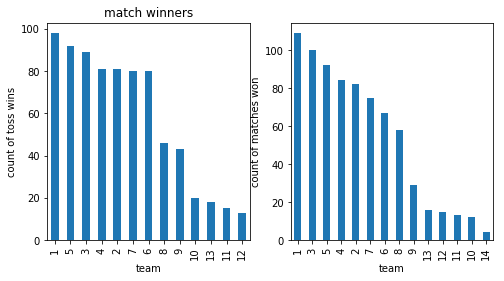

In [35]:
fig= plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel('team')
ax1.set_ylabel('count of toss wins')
ax1.set_title("toss winners")
toss_wins.plot(kind='bar')

ax2=fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('team')
ax2.set_ylabel('count of matches won')
ax1.set_title("match winners")



In [37]:
match_df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [38]:
##Dropping the redundant columns

In [39]:
match_df= match_df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
match_df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,8,4,Hyderabad,field,4,"Rajiv Gandhi International Stadium, Uppal",8
1,1,12,Pune,field,12,Maharashtra Cricket Association Stadium,12
2,11,5,Rajkot,field,5,Saurashtra Cricket Association Stadium,5
3,12,2,Indore,field,2,Holkar Cricket Stadium,2
4,4,6,Bangalore,bat,4,M Chinnaswamy Stadium,4
5,11,8,Hyderabad,field,8,"Rajiv Gandhi International Stadium, Uppal",8
6,5,1,Mumbai,field,1,Wankhede Stadium,1
7,4,2,Indore,bat,4,Holkar Cricket Stadium,2
8,6,12,Pune,field,12,Maharashtra Cricket Association Stadium,6
9,8,1,Mumbai,field,1,Wankhede Stadium,1


In [41]:
##one way is to label encode them or one hot encoding method 
##city toss selection and venue

In [44]:
from sklearn.preprocessing import LabelEncoder

ftr_list=['city','toss_decision','venue']
encoder= LabelEncoder()
for ftr in ftr_list:
    match_df[ftr]=encoder.fit_transform(match_df[ftr])
    print(encoder.classes_)
    
match_df

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
['bat' 'field']
['ACA-VDCA Stadium' 'Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Feroz Shah Kotla Ground' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'IS Bindra Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M. A. Chidambaram Stadium'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New Wanderers Stadium' 'Newlands' 'OUTsurance Oval'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Punjab Cricket Association Stadium, Mohali'
 'Rajiv Gandhi International Stadium, Uppal'
 'Rajiv Gandhi Intl. Cricket Stadium' 'Sardar Patel Stadium, Motera'
 

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,8,4,14,1,4,28,8
1,1,12,26,1,12,21,12
2,11,5,28,1,5,31,5
3,12,2,15,1,2,13,2
4,4,6,2,0,4,17,4
5,11,8,14,1,8,28,8
6,5,1,23,1,1,40,1
7,4,2,15,0,4,13,2
8,6,12,26,1,12,21,6
9,8,1,23,1,1,40,1


In [45]:
## Machine Learning

In [46]:
from sklearn.model_selection import train_test_split

train_df,test_df=train_test_split(match_df,test_size=0.2,random_state=5)
print(train_df.shape)
print(test_df.shape)

(604, 7)
(152, 7)


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def print_model_scores(model,data,predictor,target):
    model.fit(data[predictor],data[target])
    predictions=model.predict(data[predictor])
    accuracy=accuracy_score(predictions,data[target])
    print('Accuracy: %s' % '{0:.2}'.format(accuracy))
    scores=cross_val_score(model, data[predictor], data[target],scoring="neg_mean_squared_error",cv=5)
    print('cross-validation scores:{}'.format(np.sqrt(-scores)))
    print(f'average rmse: {np.sqrt(-scores).mean()}')
    

In [70]:
##logistic regression
target_var=['winner']
predictor_var=['team1','team2','venue','toss_winner','city','toss_decision']
model = LogisticRegression()

print_model_scores(model,train_df,predictor_var,target_var)

import warnings
warnings.filterwarnings('ignore')

Accuracy: 0.32
cross-validation scores:[2.7976368  2.77227053 2.87869506 2.95158676 2.97779392]
average rmse: 2.8755966131802277


In [71]:
##Random forest 
model=RandomForestClassifier(n_estimators=100)
print_model_scores(model,train_df,predictor_var,target_var)

Accuracy: 0.89
cross-validation scores:[3.59023172 2.74449596 3.43678271 2.99009665 3.37481563]
average rmse: 3.227284532879574
